In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


# NECC Tornado and Derecho Distaster Project Team Beltaniacs

## tornado csv files

### tornado calls

In [2]:
tornado_calls = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')
tornado_calls

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector
3,3/3/2020 0:36,911 Calls,NaN,NaN,526 FOUNDRY DR
4,3/3/2020 0:36,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N
...,...,...,...,...,...
470,3/3/2020 4:54,911 Calls,36.142552,-86.635330,WIRELESS CALLER
471,3/3/2020 4:54,911 Calls,36.189415,-86.813557,WIRELESS CALLER
472,3/3/2020 4:55,911 Calls,36.223534,-86.757874,WIRELESS CALLER
473,3/3/2020 4:56,911 Calls,36.168398,-86.783774,600 DR MARTIN L KING JR BLVD - NE


In [3]:
tornado_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seizure DateTime    475 non-null    object 
 1   CallTypeId          475 non-null    object 
 2   ALI Latitude        450 non-null    float64
 3   ALI Longitude       450 non-null    float64
 4   Cell Tower Address  468 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.7+ KB


In [18]:
tornado_calls['geometry'] = tornado_calls.apply(lambda x : Point((float(x['ALI Longitude']),
                                                                  float(x['ALI Latitude']))),
                                               axis=1)
tornado_calls

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.665779 36.072708)
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,POINT (-86.841904 36.159634)
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector,POINT (-86.708862 36.264153)
3,3/3/2020 0:36,911 Calls,NaN,NaN,526 FOUNDRY DR,POINT (nan nan)
4,3/3/2020 0:36,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N,POINT (-86.72107699999999 36.233467)
...,...,...,...,...,...,...
470,3/3/2020 4:54,911 Calls,36.142552,-86.635330,WIRELESS CALLER,POINT (-86.63533 36.142552)
471,3/3/2020 4:54,911 Calls,36.189415,-86.813557,WIRELESS CALLER,POINT (-86.813557 36.189415)
472,3/3/2020 4:55,911 Calls,36.223534,-86.757874,WIRELESS CALLER,POINT (-86.757874 36.223534)
473,3/3/2020 4:56,911 Calls,36.168398,-86.783774,600 DR MARTIN L KING JR BLVD - NE,POINT (-86.78377399999999 36.168398)


In [21]:
tornado_calls_geo = gpd.GeoDataFrame(tornado_calls,
                                     crs = path.crs,
                                     geometry = tornado_calls['geometry'])

tornado_calls_geo

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.66578 36.07271)
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,POINT (-86.84190 36.15963)
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector,POINT (-86.70886 36.26415)
3,3/3/2020 0:36,911 Calls,NaN,NaN,526 FOUNDRY DR,POINT (nan nan)
4,3/3/2020 0:36,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N,POINT (-86.72108 36.23347)
...,...,...,...,...,...,...
470,3/3/2020 4:54,911 Calls,36.142552,-86.635330,WIRELESS CALLER,POINT (-86.63533 36.14255)
471,3/3/2020 4:54,911 Calls,36.189415,-86.813557,WIRELESS CALLER,POINT (-86.81356 36.18941)
472,3/3/2020 4:55,911 Calls,36.223534,-86.757874,WIRELESS CALLER,POINT (-86.75787 36.22353)
473,3/3/2020 4:56,911 Calls,36.168398,-86.783774,600 DR MARTIN L KING JR BLVD - NE,POINT (-86.78377 36.16840)


In [22]:
tornado_calls_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Seizure DateTime    475 non-null    object  
 1   CallTypeId          475 non-null    object  
 2   ALI Latitude        450 non-null    float64 
 3   ALI Longitude       450 non-null    float64 
 4   Cell Tower Address  468 non-null    object  
 5   geometry            475 non-null    geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 22.4+ KB


In [24]:
tornado_calls_path = gpd.sjoin(tornado_calls_geo, path, op = 'within')
tornado_calls_path

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry,index_right,efscale
6,3/3/2020 0:37,911 Calls,36.175811,-86.895654,WIRELESS CALLER,POINT (-86.89565 36.17581),4,EF0
7,3/3/2020 0:37,911 Calls,36.180500,-86.883681,WIRELESS CALLER,POINT (-86.88368 36.18050),4,EF0
11,3/3/2020 0:39,911 Calls,36.173183,-86.797335,907 12TH AV N - N,POINT (-86.79734 36.17318),4,EF0
19,3/3/2020 0:41,911 Calls,36.175361,-86.782658,500 5TH AV - SECTOR NE N,POINT (-86.78266 36.17536),4,EF0
21,3/3/2020 0:41,911 Calls,36.170395,-86.801689,1409 E E JEFFERSON ST - N Sector,POINT (-86.80169 36.17039),4,EF0
...,...,...,...,...,...,...,...,...
236,3/3/2020 1:41,911 Calls,36.180081,-86.601233,3333 LEBANON PIKE - SE,POINT (-86.60123 36.18008),24,EF2
247,3/3/2020 1:44,911 Calls,36.180114,-86.601276,3333 LEBANON PIKE - SE,POINT (-86.60128 36.18011),24,EF2
199,3/3/2020 1:31,911 Calls,36.174911,-86.805428,1409 JEFFERSON STREET - N SECTOR,POINT (-86.80543 36.17491),28,EF2
230,3/3/2020 1:38,911 Calls,36.184695,-86.641681,3333 LEBANON PIKE - SW,POINT (-86.64168 36.18469),20,EF3


In [25]:
tornado_calls_path.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 325 entries, 6 to 255
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Seizure DateTime    325 non-null    object  
 1   CallTypeId          325 non-null    object  
 2   ALI Latitude        325 non-null    float64 
 3   ALI Longitude       325 non-null    float64 
 4   Cell Tower Address  325 non-null    object  
 5   geometry            325 non-null    geometry
 6   index_right         325 non-null    int64   
 7   efscale             325 non-null    object  
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 22.9+ KB


In [30]:
tornado_calls_path['CallTypeId'].value_counts()

911 Calls    325
Name: CallTypeId, dtype: int64

### tornado CADD 

In [44]:
tornado_cadd = pd.read_csv('../data/Computer_Aided_Dispatch_Data_Tornado_Incidents_030320.csv', skiprows=3)
tornado_cadd

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL
3,3/3/2020 12:39:40 AM,555 MARRIOTT DR,36.151108,-86.689921,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
...,...,...,...,...,...
255,3/3/2020 4:53:43 AM,1616 23RD AV N,36.175739,-86.813173,WIRES DOWN WITH NO SMOKE OR ARCING POWER DISCO...
256,3/3/2020 4:56:56 AM,5610 OLD HICKORY BLVD,36.180487,-86.601466,LARGE BUILDING INVESTIGATION
257,3/3/2020 4:57:06 AM,2903 MORNINGSIDE DR,36.223554,-86.757949,CHEST PAIN - ABNORMAL BREATHING
258,3/3/2020 4:57:14 AM,1730 KELLOW ST,36.189445,-86.813466,ABNORMAL BREATHING OTHER LUNG PROBLEMS


In [45]:
tornado_cadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IncidentDate              260 non-null    object 
 1   Location                  260 non-null    object 
 2   Latitude1                 260 non-null    float64
 3   Longitude1                260 non-null    float64
 4   IncidentTypeDescription1  260 non-null    object 
dtypes: float64(2), object(3)
memory usage: 10.3+ KB


In [46]:
tornado_cadd['geometry'] = tornado_cadd.apply(lambda x : Point((float(x.Longitude1),
                                                                float(x.Latitude1))),
                                              axis=1)
tornado_cadd

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,geometry
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89405212 36.18200191)
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89497756999999 36.175666)
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL,POINT (-86.8837274 36.17929946)
3,3/3/2020 12:39:40 AM,555 MARRIOTT DR,36.151108,-86.689921,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.6899214 36.1511077)
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.84593411 36.17792604)
...,...,...,...,...,...,...
255,3/3/2020 4:53:43 AM,1616 23RD AV N,36.175739,-86.813173,WIRES DOWN WITH NO SMOKE OR ARCING POWER DISCO...,POINT (-86.8131726 36.17573935)
256,3/3/2020 4:56:56 AM,5610 OLD HICKORY BLVD,36.180487,-86.601466,LARGE BUILDING INVESTIGATION,POINT (-86.60146627 36.18048712)
257,3/3/2020 4:57:06 AM,2903 MORNINGSIDE DR,36.223554,-86.757949,CHEST PAIN - ABNORMAL BREATHING,POINT (-86.75794879999999 36.2235535)
258,3/3/2020 4:57:14 AM,1730 KELLOW ST,36.189445,-86.813466,ABNORMAL BREATHING OTHER LUNG PROBLEMS,POINT (-86.81346598 36.18944545)


In [47]:
tornado_cadd_geo = gpd.GeoDataFrame(tornado_cadd,
                                     crs = path.crs,
                                     geometry = tornado_cadd['geometry'])

tornado_cadd_geo

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,geometry
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89405 36.18200)
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89498 36.17567)
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL,POINT (-86.88373 36.17930)
3,3/3/2020 12:39:40 AM,555 MARRIOTT DR,36.151108,-86.689921,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.68992 36.15111)
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.84593 36.17793)
...,...,...,...,...,...,...
255,3/3/2020 4:53:43 AM,1616 23RD AV N,36.175739,-86.813173,WIRES DOWN WITH NO SMOKE OR ARCING POWER DISCO...,POINT (-86.81317 36.17574)
256,3/3/2020 4:56:56 AM,5610 OLD HICKORY BLVD,36.180487,-86.601466,LARGE BUILDING INVESTIGATION,POINT (-86.60147 36.18049)
257,3/3/2020 4:57:06 AM,2903 MORNINGSIDE DR,36.223554,-86.757949,CHEST PAIN - ABNORMAL BREATHING,POINT (-86.75795 36.22355)
258,3/3/2020 4:57:14 AM,1730 KELLOW ST,36.189445,-86.813466,ABNORMAL BREATHING OTHER LUNG PROBLEMS,POINT (-86.81347 36.18945)


In [48]:
tornado_cadd_path = gpd.sjoin(tornado_cadd_geo, path, op = 'within')
tornado_cadd_path

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,geometry,index_right,efscale
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89498 36.17567),4,EF0
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL,POINT (-86.88373 36.17930),4,EF0
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.84593 36.17793),4,EF0
5,3/3/2020 12:40:11 AM,1406 COUNTY HOSPITAL RD,36.178264,-86.850464,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.85046 36.17826),4,EF0
8,3/3/2020 12:42:51 AM,1625 DR D B TODD JR BLVD,36.175630,-86.809654,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.80965 36.17563),4,EF0
...,...,...,...,...,...,...,...,...
88,3/3/2020 1:39:00 AM,1107 FOREST RIDGE WAY,36.177887,-86.585465,UNKNOWN STATUS,POINT (-86.58547 36.17789),16,EF2
127,3/3/2020 1:58:33 AM,703 MARGARET ROBERTSON DR,36.179982,-86.600086,UNCONFIRMED ENTRAPMENT LARGE BUIDING,POINT (-86.60009 36.17998),15,EF2
148,3/3/2020 2:08:54 AM,3213 FRENO LN,36.178065,-86.677046,OUTSIDE ODOR,POINT (-86.67705 36.17807),30,EF2
154,3/3/2020 2:10:45 AM,1021 RUSSELL ST,36.175940,-86.750410,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.75041 36.17594),12,EF3


### path geojson

In [20]:
path = gpd.read_file('../data/path_polygons.geojson')
print(path.crs)
path

epsg:4326


,efscale,geometry
0,EF3,"POLYGON ((-85.59922 36.17660, -85.59840 36.176..."
1,EF1,"POLYGON ((-85.52390 36.17189, -85.52430 36.171..."
2,EF1,"POLYGON ((-85.61527 36.17529, -85.61403 36.175..."
3,EF3,"POLYGON ((-85.55185 36.17398, -85.55184 36.173..."
4,EF0,"POLYGON ((-86.94788 36.17248, -86.94582 36.172..."
5,EF0,"POLYGON ((-84.79918 36.12665, -84.79661 36.124..."
6,EF2,"POLYGON ((-86.31818 36.84809, -86.31659 36.847..."
7,EF0,"POLYGON ((-87.62268 32.68464, -87.62261 32.684..."
8,EF0,"POLYGON ((-87.04970 32.86477, -87.03895 32.861..."
9,EF1,"POLYGON ((-87.04224 32.86482, -87.03977 32.863..."


In [ ]:
path.crs


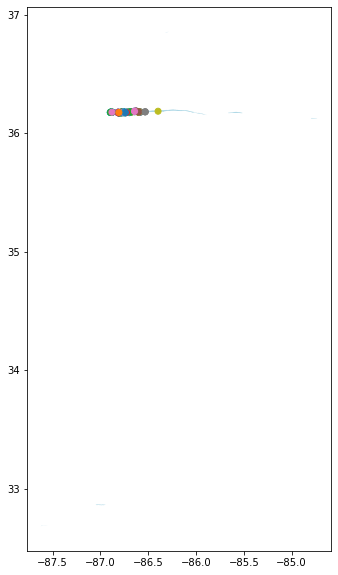

In [31]:
ax = path.plot(figsize = (10, 10), color = 'lightblue')
tornado_calls_path.plot( ax = ax, column = 'Cell Tower Address');

In [35]:
path.geometry.centroid

C:\Users\Patrick\AppData\Local\Temp/ipykernel_3428/223335599.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  path.geometry.centroid


0     POINT (-85.58051 36.17637)
1     POINT (-85.52194 36.17181)
2     POINT (-85.57659 36.17520)
3     POINT (-85.55155 36.17395)
4     POINT (-86.44245 36.18304)
5     POINT (-84.76979 36.12643)
6     POINT (-86.30432 36.85182)
7     POINT (-87.59325 32.68826)
8     POINT (-86.99875 32.86394)
9     POINT (-87.00212 32.86428)
10    POINT (-86.30965 36.19269)
11    POINT (-86.56985 36.17644)
12    POINT (-86.75082 36.17636)
13    POINT (-86.52102 36.18248)
14    POINT (-86.55658 36.17715)
15    POINT (-86.60012 36.18011)
16    POINT (-86.58591 36.17805)
17    POINT (-86.47368 36.18450)
18    POINT (-86.43360 36.18592)
19    POINT (-86.46818 36.18489)
20    POINT (-86.64679 36.18385)
21    POINT (-86.77344 36.17640)
22    POINT (-86.78973 36.17465)
23    POINT (-86.47697 36.18356)
24    POINT (-86.62464 36.18300)
25    POINT (-85.58658 36.17388)
26    POINT (-86.74060 36.17558)
27    POINT (-86.82236 36.17547)
28    POINT (-86.80501 36.17459)
29    POINT (-86.87804 36.17677)
30    POIN

In [36]:
center = path.geometry.centroid[18]
print(center)

POINT (-86.43360103332883 36.18591898648616)


C:\Users\Patrick\AppData\Local\Temp/ipykernel_3428/1199352813.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = path.geometry.centroid[18]


In [37]:
area_center = [center.y, center.x]

In [38]:
calls_path_map = folium.Map(location =  area_center, zoom_start = 12)
calls_path_map

In [43]:
calls_path_map = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(path).add_to(calls_path_map)

for row_index, row_values in tornado_calls_path.iterrows():
    loc = [row_values['ALI Latitude'], row_values['ALI Longitude']]
    pop = str(row_values['Seizure DateTime'])
    icon=folium.Icon(color="red",icon="wind", prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    marker.add_to(calls_path_map)
    
calls_path_map

In [39]:
tornado_calls_path

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry,index_right,efscale
6,3/3/2020 0:37,911 Calls,36.175811,-86.895654,WIRELESS CALLER,POINT (-86.89565 36.17581),4,EF0
7,3/3/2020 0:37,911 Calls,36.180500,-86.883681,WIRELESS CALLER,POINT (-86.88368 36.18050),4,EF0
11,3/3/2020 0:39,911 Calls,36.173183,-86.797335,907 12TH AV N - N,POINT (-86.79734 36.17318),4,EF0
19,3/3/2020 0:41,911 Calls,36.175361,-86.782658,500 5TH AV - SECTOR NE N,POINT (-86.78266 36.17536),4,EF0
21,3/3/2020 0:41,911 Calls,36.170395,-86.801689,1409 E E JEFFERSON ST - N Sector,POINT (-86.80169 36.17039),4,EF0
...,...,...,...,...,...,...,...,...
236,3/3/2020 1:41,911 Calls,36.180081,-86.601233,3333 LEBANON PIKE - SE,POINT (-86.60123 36.18008),24,EF2
247,3/3/2020 1:44,911 Calls,36.180114,-86.601276,3333 LEBANON PIKE - SE,POINT (-86.60128 36.18011),24,EF2
199,3/3/2020 1:31,911 Calls,36.174911,-86.805428,1409 JEFFERSON STREET - N SECTOR,POINT (-86.80543 36.17491),28,EF2
230,3/3/2020 1:38,911 Calls,36.184695,-86.641681,3333 LEBANON PIKE - SW,POINT (-86.64168 36.18469),20,EF3


In [51]:
calls_path_map = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(path).add_to(calls_path_map)

for row_index, row_values in tornado_cadd_path.iterrows():
    loc = [row_values['Latitude1'], row_values['Longitude1']]
    pop = str(row_values['IncidentDate'])
    icon=folium.Icon(color="green",icon="wind", prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    marker.add_to(calls_path_map)
    
calls_path_map

In [49]:
tornado_cadd_path

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1,geometry,index_right,efscale
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89498 36.17567),4,EF0
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL,POINT (-86.88373 36.17930),4,EF0
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.84593 36.17793),4,EF0
5,3/3/2020 12:40:11 AM,1406 COUNTY HOSPITAL RD,36.178264,-86.850464,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.85046 36.17826),4,EF0
8,3/3/2020 12:42:51 AM,1625 DR D B TODD JR BLVD,36.175630,-86.809654,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.80965 36.17563),4,EF0
...,...,...,...,...,...,...,...,...
88,3/3/2020 1:39:00 AM,1107 FOREST RIDGE WAY,36.177887,-86.585465,UNKNOWN STATUS,POINT (-86.58547 36.17789),16,EF2
127,3/3/2020 1:58:33 AM,703 MARGARET ROBERTSON DR,36.179982,-86.600086,UNCONFIRMED ENTRAPMENT LARGE BUIDING,POINT (-86.60009 36.17998),15,EF2
148,3/3/2020 2:08:54 AM,3213 FRENO LN,36.178065,-86.677046,OUTSIDE ODOR,POINT (-86.67705 36.17807),30,EF2
154,3/3/2020 2:10:45 AM,1021 RUSSELL ST,36.175940,-86.750410,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.75041 36.17594),12,EF3


# damage points geojson

In [52]:
damage_points = gpd.read_file('../data/damage_points.geojson')
damage_points

,objectid,stormdate,surveydate,event_id,damage,damage_txt,dod_txt,efscale,damage_dir,windspeed,...,device_id,qc,dod,surveytype,globalid,edit_user,edit_time,comments,path_guid,geometry
0,2047717,1583218620000,1583335680000,Mount Juliet,2,One- or Two-Family Residences (FR12),All walls collapsed,EF3,N/A,155,...,None,Y,9,None,{FE82BBAC-ABF8-4562-81F6-A527829FBFFE},None,None,none,None,POINT (-86.51628 36.18344)
1,2047909,1583221860000,1583437860000,Cookeville,27,Trees: Hardwood (TH),Trees uprooted,EF0,N/A,80,...,None,Y,3,None,{2417B433-0C00-4D6C-A059-45E0CFDA2AF6},None,None,none,None,POINT (-85.60552 36.17308)
2,2075630,1583221980000,1586759820000,Cookeville,2,One- or Two-Family Residences (FR12),"Loss of roof covering material (<20%), gutters...",EF0,N/A,80,...,None,Y,2,None,{10AC67A3-D75D-4E6E-82B8-DD307E183FC0},None,None,None,None,POINT (-85.57574 36.17740)
3,2060941,1583217780000,1585242540000,,1,Small Barns or Farm Outbuildings (SBO),Total destruction of building,EF1,N/A,95,...,None,Y,8,None,{A0744CB4-5993-4056-A13C-CF75182F5147},None,None,None,None,POINT (-86.76228 36.17340)
4,2060984,1583217780000,1585256400000,,7,Masonry Apartment or Motel Building (MAM),Loss of roof covering (<20%),EF0,N/A,80,...,None,Y,2,None,{DA83D428-084A-4ACA-A39E-DEE84AA28463},None,None,None,None,POINT (-86.75692 36.17568)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,2114432,1583219640000,1588470780000,,3,Manufactured Home - Single Wide (MHSW),Loss of shingles or partial uplift of one-piec...,EF0,N/A,75,...,None,Y,2,None,{44F412AC-5781-48C8-96BA-C55B7988DD17},None,None,None,None,POINT (-86.22961 36.19636)
3963,2114433,1583219700000,1588472700000,,2,One- or Two-Family Residences (FR12),"Loss of roof covering material (<20%), gutters...",EF0,N/A,85,...,None,Y,2,None,{874F6609-57F6-46B6-ACE9-4B699685233D},None,None,None,None,POINT (-86.20841 36.19219)
3964,2114434,1583220360000,1588482840000,,1,Small Barns or Farm Outbuildings (SBO),Total destruction of building,EF1,N/A,95,...,None,Y,8,None,{F21CA6EF-0A9C-4653-9D2A-87ECC197B98F},None,None,None,None,POINT (-86.02540 36.17764)
3965,2320477,1583217120000,1618702140000,Nashville,29,Other (O),Other damage,EF0,N/A,70,...,None,Y,1,None,{5071191E-4409-4F75-BD83-BE52ED30723C},None,None,Boathouse and dock blown northward and heavily...,None,POINT (-86.94269 36.17417)


In [53]:
damage_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   objectid            3967 non-null   int64   
 1   stormdate           3967 non-null   int64   
 2   surveydate          3967 non-null   int64   
 3   event_id            3967 non-null   object  
 4   damage              3967 non-null   int64   
 5   damage_txt          3967 non-null   object  
 6   dod_txt             3967 non-null   object  
 7   efscale             3967 non-null   object  
 8   damage_dir          3967 non-null   object  
 9   windspeed           3967 non-null   object  
 10  injuries            3967 non-null   int64   
 11  deaths              3967 non-null   int64   
 12  lat                 3967 non-null   float64 
 13  lon                 3967 non-null   float64 
 14  office              3967 non-null   object  
 15  image               3963 non-n

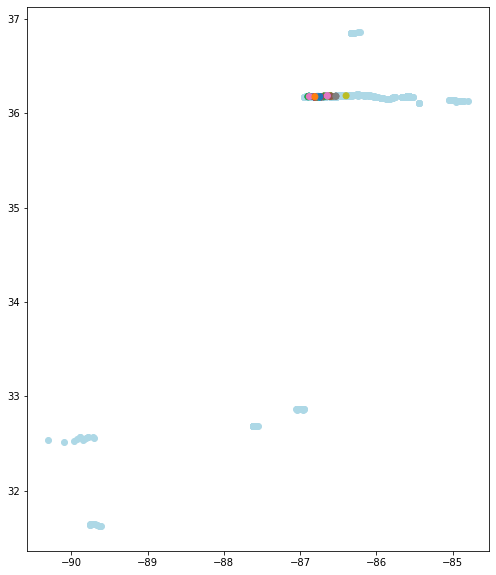

In [54]:
ax = damage_points.plot(figsize = (10, 10), color = 'lightblue')
tornado_calls_path.plot( ax = ax, column = 'Cell Tower Address');

In [55]:
damage_calls_map = folium.Map(location =  area_center, zoom_start = 12)
damage_calls_map

In [60]:
tornado_calls_path = tornado_calls_path.loc[tornado_calls_path['Cell Tower Address'] != 'WIRELESS CALLER']
tornado_calls_path.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 254 entries, 11 to 255
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Seizure DateTime    254 non-null    object  
 1   CallTypeId          254 non-null    object  
 2   ALI Latitude        254 non-null    float64 
 3   ALI Longitude       254 non-null    float64 
 4   Cell Tower Address  254 non-null    object  
 5   geometry            254 non-null    geometry
 6   index_right         254 non-null    int64   
 7   efscale             254 non-null    object  
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 17.9+ KB


In [79]:
tornado_call_time = tornado_calls_path['geometry'], ['Seizure DateTime']
tornado_call_time

(11     POINT (-86.79734 36.17318)
 19     POINT (-86.78266 36.17536)
 21     POINT (-86.80169 36.17039)
 26     POINT (-86.80169 36.17039)
 31     POINT (-86.78077 36.17587)
                   ...            
 236    POINT (-86.60123 36.18008)
 247    POINT (-86.60128 36.18011)
 199    POINT (-86.80543 36.17491)
 230    POINT (-86.64168 36.18469)
 255    POINT (-86.53113 36.18037)
 Name: geometry, Length: 254, dtype: geometry,
 ['Seizure DateTime'])

In [67]:
tornado_calls_datetime = pd.to_datetime(tornado_call_time)

In [69]:
tornado_calls_datetime

11    2020-03-03 00:39:00
19    2020-03-03 00:41:00
21    2020-03-03 00:41:00
26    2020-03-03 00:42:00
31    2020-03-03 00:43:00
              ...        
236   2020-03-03 01:41:00
247   2020-03-03 01:44:00
199   2020-03-03 01:31:00
230   2020-03-03 01:38:00
255   2020-03-03 01:47:00
Name: Seizure DateTime, Length: 254, dtype: datetime64[ns]

In [73]:
type(tornado_calls_datetime)

pandas.core.series.Series

In [ ]:
x = 